# Setting Up Your A/B Testing Project in Python

🧠 Step 1: Install required libraries

In [9]:
!pip install -q statsmodels

🧩 Step 2: Import libraries

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['font.size'] = 12

🧪 Step 3: Simulate A/B testing data

In [16]:
# You can change these numbers to simulate different experiments
n_A = 1000  # number of visitors in group A
n_B = 1000  # number of visitors in group B
p_A = 0.10  # conversion rate for A (10%)
p_B = 0.12  # conversion rate for B (12%)

# Generate random conversion data
rng = np.random.default_rng(42)
conv_A = rng.binomial(1, p_A, size=n_A)
conv_B = rng.binomial(1, p_B, size=n_B)

# Combine into a single DataFrame
df_A = pd.DataFrame({'group': 'A', 'converted': conv_A})
df_B = pd.DataFrame({'group': 'B', 'converted': conv_B})
df = pd.concat([df_A, df_B], ignore_index=True)

df.head()

,group,converted
0,A,0
1,A,0
2,A,0
3,A,0
4,A,0


📊 Step 4: Summarize conversion data

In [17]:
summary = df.groupby('group')['converted'].agg(['count','sum']).rename(columns={'count':'visitors','sum':'conversions'})
summary['rate'] = summary['conversions'] / summary['visitors']
summary = summary.reset_index()
summary

,group,visitors,conversions,rate
0,A,1000,98,0.098
1,B,1000,128,0.128


🧮 Step 5: Perform Z-test for proportions

In [18]:
counts = summary['conversions'].values
nobs = summary['visitors'].values

z_stat, p_value = proportions_ztest(counts, nobs)
confints = [proportion_confint(c, n, method='wilson') for c, n in zip(counts, nobs)]

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print("\n95% Confidence Intervals:")
for g, ci in zip(summary['group'], confints):
    print(f"{g}: {ci}")

Z-statistic: -2.1189
P-value: 0.034101

95% Confidence Intervals:
A: (0.08108201152335034, 0.11799470229903597)
B: (0.10870752216300936, 0.15013958615024367)


📈 Step 6: Visualize conversion rates

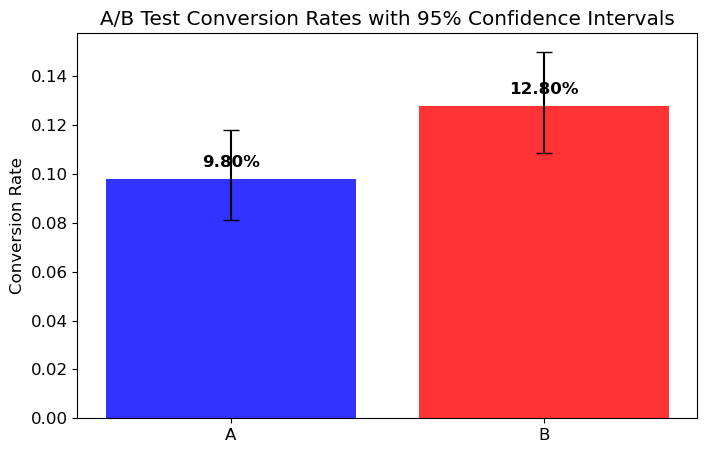

In [19]:
rates = summary['rate'].values
groups = summary['group'].tolist()

# Calculate CI for error bars
cis = []
for idx, row in summary.iterrows():
    lo, hi = proportion_confint(row['conversions'], row['visitors'], method='wilson')
    cis.append([rates[idx] - lo, hi - rates[idx]])
cis = np.array(cis).T

x = np.arange(len(groups))
plt.bar(x, rates, tick_label=groups, color=['blue','Red'], alpha=0.8)
plt.errorbar(x, rates, yerr=cis, fmt='none', capsize=6, color='black')
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Rates with 95% Confidence Intervals")

for i, r in enumerate(rates):
    plt.text(i, r + 0.005, f"{r*100:.2f}%", ha='center', fontweight='bold')

plt.show()

🧾 Step 7: Print final interpretation

In [15]:
alpha = 0.05
print("\n--- FINAL INTERPRETATION ---")
if p_value < alpha:
    print(f"✅ The difference between A and B is statistically significant (p < {alpha}).")
    print("Group B performed better!" if summary.loc[1, 'rate'] > summary.loc[0, 'rate'] else "Group A performed better!")
else:
    print(f"❌ No statistically significant difference (p ≥ {alpha}).")
    print("Both groups performed similarly.")


--- FINAL INTERPRETATION ---
✅ The difference between A and B is statistically significant (p < 0.05).
Group B performed better!


🧾 Project Summary:
- Objective: Compare Group A and Group B conversion performance.
- Method: Z-test for two proportions.
- Result: Group B shows a statistically significant improvement.
- Decision: Adopt version B for better conversion outcomes.